## 80 Cereals
Nutrition data on 80 cereal product

### Project Introduction

#### About this Dataset

Fields in the dataset:

Name: Name of cereal
mfr: Manufacturer of cereal
A = American Home Food Products;
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats
R = Ralston Purina
type:
cold
hot
calories: calories per serving
protein: grams of protein
fat: grams of fat
sodium: milligrams of sodium
fiber: grams of dietary fiber
carbo: grams of complex carbohydrates
sugars: grams of sugars
potass: milligrams of potassium
vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
shelf: display shelf (1, 2, or 3, counting from the floor)
weight: weight in ounces of one serving
cups: number of cups in one serving
rating: a rating of the cereals (Possibly from Consumer Reports?)

#### Project Objectives

In [1]:
import opendatasets as od 

od.download("https://www.kaggle.com/datasets/crawford/80-cereals?resource=download")

Skipping, found downloaded files in ".\80-cereals" (use force=True to force download)


In [2]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

%matplotlib inline

mpl.style.use("ggplot")

In [3]:
df = pd.read_csv("80-cereals/cereal.csv")

In [4]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [5]:
df.columns = df.columns.str.capitalize()

In [6]:
df.rename(columns={
    'Mfr':'Manufacturer',
    'Potass':'Pottasium(mg)',
    'Fat':'Fat(g)'}, inplace=True)

In [7]:
df.head()

,Name,Manufacturer,Type,Calories,Protein,Fat(g),Sodium,Fiber,Carbo,Sugars,Pottasium(mg),Vitamins,Shelf,Weight,Cups,Rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


### EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           77 non-null     object 
 1   Manufacturer   77 non-null     object 
 2   Type           77 non-null     object 
 3   Calories       77 non-null     int64  
 4   Protein        77 non-null     int64  
 5   Fat(g)         77 non-null     int64  
 6   Sodium         77 non-null     int64  
 7   Fiber          77 non-null     float64
 8   Carbo          77 non-null     float64
 9   Sugars         77 non-null     int64  
 10  Pottasium(mg)  77 non-null     int64  
 11  Vitamins       77 non-null     int64  
 12  Shelf          77 non-null     int64  
 13  Weight         77 non-null     float64
 14  Cups           77 non-null     float64
 15  Rating         77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [9]:
df.describe()

,Calories,Protein,Fat(g),Sodium,Fiber,Carbo,Sugars,Pottasium(mg),Vitamins,Shelf,Weight,Cups,Rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [10]:
g = df[df["Pottasium(mg)"] < 0]['Pottasium(mg)'].count()
h = df[df["Sugars"] < 0]['Sugars'].count()
i = df[df["Carbo"] < 0]['Carbo'].count()

print('negative values in Pottasium(mg) column:', g)
print('negative values in Sugars column:', h)
print('negative values in Carbo column:', i)

negative values in Pottasium(mg) column: 2
negative values in Sugars column: 1
negative values in Carbo column: 1


In [11]:
## replacing negative values in the dataset with the mean of the column. 
cols = df[['Carbo', 'Sugars', 'Pottasium(mg)']].mean()
df.replace(-1, cols, inplace=True)

In [12]:
df.isnull().sum()

Name             0
Manufacturer     0
Type             0
Calories         0
Protein          0
Fat(g)           0
Sodium           0
Fiber            0
Carbo            0
Sugars           0
Pottasium(mg)    0
Vitamins         0
Shelf            0
Weight           0
Cups             0
Rating           0
dtype: int64

In [13]:
df.describe()

,Calories,Protein,Fat(g),Sodium,Fiber,Carbo,Sugars,Pottasium(mg),Vitamins,Shelf,Weight,Cups,Rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.799966,7.024962,98.599427,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.881605,4.349770,69.479240,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.597403,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [14]:
unique_brands = df['Name'].unique()
print(f'There are {len(unique_brands)} unique brands in this dataset')

There are 77 unique brands in this dataset


In [15]:
## Highest rated brand
df[df['Rating']==df['Rating'].max()][['Name', 'Rating', 'Manufacturer']]

,Name,Rating,Manufacturer
3,All-Bran with Extra Fiber,93.704912,K


In [16]:
## Highest rated brand
df[df['Rating']==df['Rating'].min()][['Name', 'Rating', 'Manufacturer']]

,Name,Rating,Manufacturer
10,Cap'n'Crunch,18.042851,Q


Kellogs are the manufacturer of the Cereal with the highet rating, Quacker oats is the manufacturer with the lowest rated Cereal with a rating of 18.0

In [17]:
## which companies produce the highest
df[df['Calories']==df['Calories'].max()][['Name', 'Calories', 'Manufacturer', 'Rating']]

,Name,Calories,Manufacturer,Rating
46,Mueslix Crispy Blend,160,K,30.313351


In [18]:
df[df['Calories']==df['Calories'].min()][['Name', 'Calories', 'Manufacturer', 'Rating']]

,Name,Calories,Manufacturer,Rating
3,All-Bran with Extra Fiber,50,K,93.704912
54,Puffed Rice,50,Q,60.756112
55,Puffed Wheat,50,Q,63.005645


"Mueslix Crsipy Blend" is the cereal with the highest Calory per serving, and
"All-Bran with Extra fiber", "Puffed Rice" and "Puffed wheat" are the cereals with the lowest rating. 

<Axes: title={'center': 'Rating'}, xlabel='Type'>

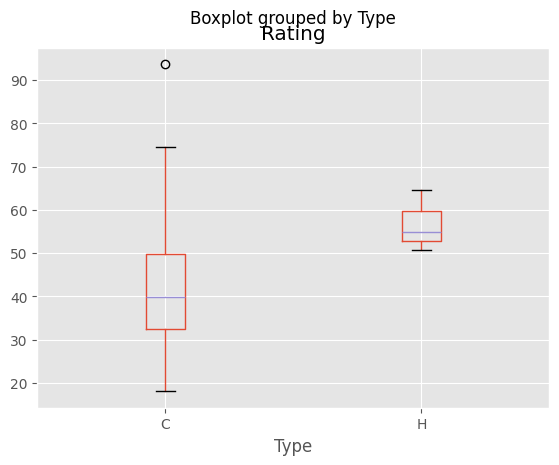

In [19]:
df.boxplot('Rating', 'Type')

In [25]:
## to get the Cereals with the least amount of calories
lower_calories = df.sort_values(by='Calories', ascending=True)
lower_calories = lower_calories.head(10) 

## to get the cereals with the highest amount of calories
higher_caloric = df.sort_values(by='Calories', ascending=False)
higher_caloric = higher_caloric.head(10) 

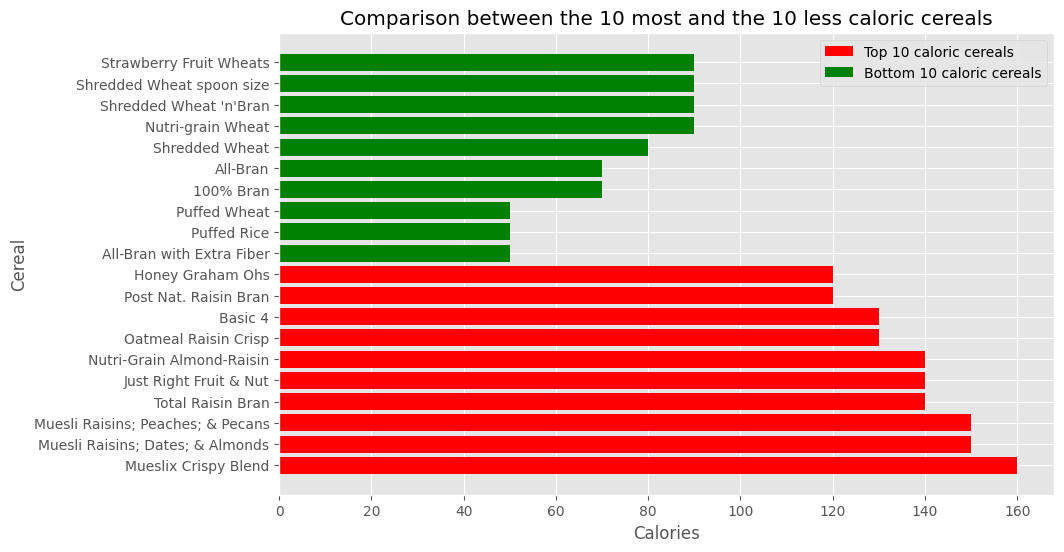

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(higher_caloric['Name'],higher_caloric['Calories'], color = 'red', label = 'Top 10 caloric cereals')
ax.barh(lower_calories['Name'], lower_calories['Calories'], color = 'green', label = 'Bottom 10 caloric cereals')
ax.set_xlabel('Calories')
ax.set_ylabel('Cereal')
ax.set_title('Comparison between the 10 most and the 10 less caloric cereals')
ax.legend()

plt.show()